In [1]:
pip install pandas matplotlib numpy scipy seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the uploaded CSV file
file_path = '2018-10-01-2023-12-06.csv'
raw_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
raw_data.head(10)

,Date,Income/Expenses,Category,Memo,Amount
0,2023-12-01,Expenses,Home,NaN,-575.00
1,2023-11-30,Expenses,Shopping,advent calendar,-23.56
2,2023-11-28,Expenses,groceries,NaN,-1.79
3,2023-11-28,Expenses,toiletries,NaN,-9.90
4,2023-11-28,Expenses,Eating Out,NaN,-4.90
5,2023-11-27,Expenses,Eating Out,NaN,-2.50
6,2023-11-27,Expenses,Bills,n26 card,-10.00
7,2023-11-25,Expenses,groceries,NaN,-8.25
8,2023-11-24,Expenses,Eating Out,NaN,-5.40
9,2023-11-23,Expenses,groceries,NaN,-10.61


In [3]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])


In [4]:
data_2018 = raw_data[raw_data['Date'].dt.year == 2018]


In [5]:
data_2018.head(10)

,Date,Income/Expenses,Category,Memo,Amount
1544,2018-12-29,Expenses,groceries,asshole,-20.00
1545,2018-12-28,Expenses,Travel,Hannover trip,-79.69
1546,2018-12-28,Expenses,Transportation,Hannover,-14.00
1547,2018-12-24,Expenses,Shopping,NaN,-10.00
1548,2018-12-20,Expenses,Transportation,Hannover,-27.90
1549,2018-12-20,Expenses,Food,NaN,-3.00
1550,2018-12-18,Expenses,Telephone,NaN,-9.86
1551,2018-12-17,Expenses,Insurance,NaN,-180.68
1552,2018-12-17,Expenses,groceries,rice,-10.00
1553,2018-12-15,Expenses,groceries,NaN,-13.43


In [6]:
#create different dataframes based on year
data_2019 = raw_data[raw_data['Date'].dt.year == 2019]
data_2020 = raw_data[raw_data['Date'].dt.year == 2020]
data_2021 = raw_data[raw_data['Date'].dt.year == 2021]
data_2022 = raw_data[raw_data['Date'].dt.year == 2022]
data_2023 = raw_data[raw_data['Date'].dt.year == 2023]

In [7]:
data_2020.head()

,Date,Income/Expenses,Category,Memo,Amount
1021,2020-12-31,Income,Refunds,NaN,8.00
1022,2020-12-31,Income,Grants,NaN,500.00
1023,2020-12-31,Income,Refunds,NaN,18.00
1024,2020-12-29,Expenses,Junk Food,NaN,-2.50
1025,2020-12-29,Expenses,groceries,NaN,-3.71


In [8]:
# Creating separate columns for Income and Expenses in a simpler way
raw_data['Income'] = 0
raw_data['Expense'] = 0

# Assigning values to the new columns
raw_data.loc[raw_data['Income/Expenses'] == 'Income', 'Income'] = raw_data['Amount']
raw_data.loc[raw_data['Income/Expenses'] == 'Expenses', 'Expense'] = -raw_data['Amount']

# Removing the 'Amount' column from the dataframe
raw_data = raw_data.drop('Amount', axis=1)

# Display the first few rows of the updated dataframe
raw_data.head(5)


C:\Users\Sriniva1\AppData\Local\Temp\ipykernel_19372\2148382464.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 428.34  948.46  452.25 1468.58   26.5    14.2    15.     15.     19.8
  428.34  948.     40.    200.    948.46  728.    948.4   948.46  948.46
  505.84  436.63   15.    935.64 1235.64  513.1   213.01  326.59  228.
  520.03   11.     28.7    22.5    21.1   520.03  520.    500.    660.
  500.     50.    500.    500.     90.     90.    150.    500.    500.
  500.    500.    500.     20.    300.    500.     12.      8.    500.
   18.     26.     26.     10.6    10.6   500.    500.      8.      8.
    9.      8.      9.    500.      9.      9.      8.    200.      9.
    9.      9.      8.      9.      9.      8.      9.      9.     79.99
    9.      8.      9.    294.79    9.      8.    449.64    5.     10.
  288.      5.     10.    345.      5.     10.    120.      5.     10.
  327.      5.      2.4   

,Date,Income/Expenses,Category,Memo,Income,Expense
0,2023-12-01,Expenses,Home,NaN,0.0,575.00
1,2023-11-30,Expenses,Shopping,advent calendar,0.0,23.56
2,2023-11-28,Expenses,groceries,NaN,0.0,1.79
3,2023-11-28,Expenses,toiletries,NaN,0.0,9.90
4,2023-11-28,Expenses,Eating Out,NaN,0.0,4.90


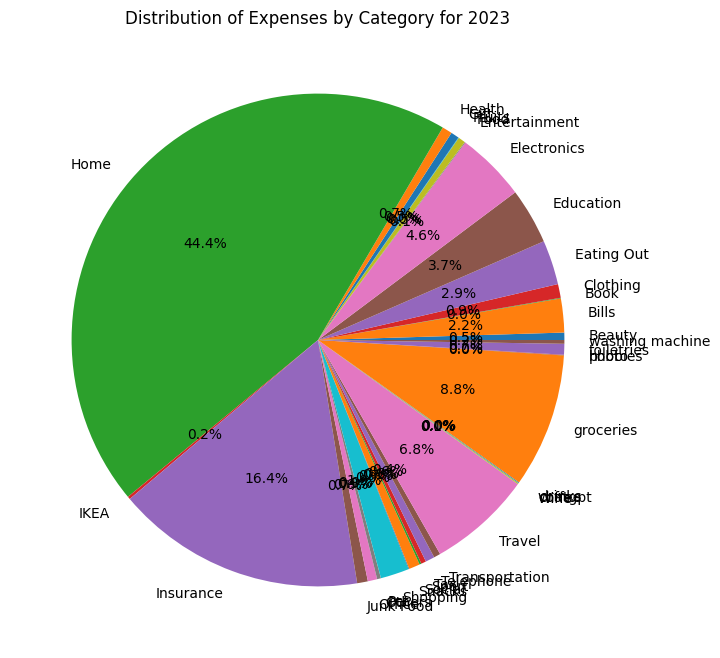

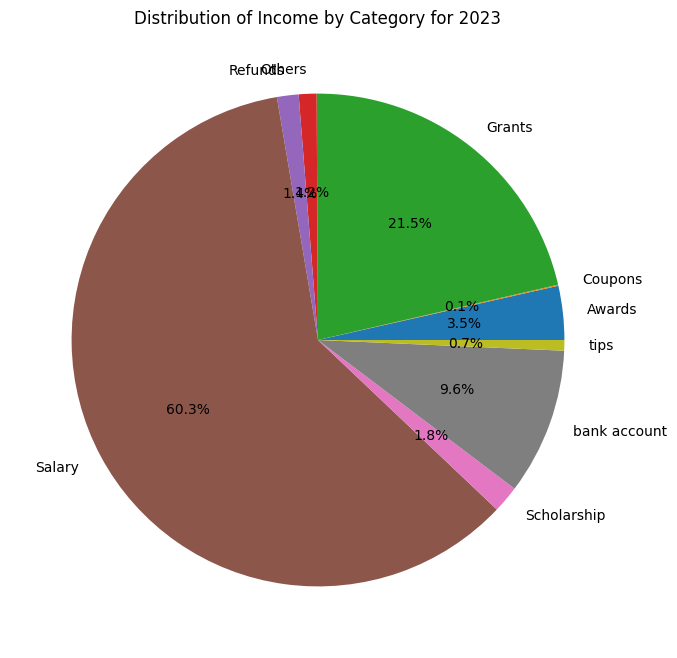

In [9]:
import matplotlib.pyplot as plt

# Assuming raw_data is your dataframe

# Calculating the total expenses for each category in 2023
expense_totals_2023 = raw_data[raw_data['Income/Expenses'] == 'Expenses'].groupby('Category')['Expense'].sum()

# Calculating the total income for each category in 2023
income_totals_2023 = raw_data[raw_data['Income/Expenses'] == 'Income'].groupby('Category')['Income'].sum()

# Plotting a pie chart for expenses in 2023
plt.figure(figsize=(10, 8))
expense_totals_2023.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Expenses by Category for 2023')
plt.ylabel('')  # Hiding the y-label
plt.show()

# Plotting a pie chart for income in 2023
plt.figure(figsize=(10, 8))
income_totals_2023.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Income by Category for 2023')
plt.ylabel('')  # Hiding the y-label
plt.show()
